# Baseline Models

The purpose of this exercise is to define a basseline model for Deep Learning models in this project

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Loading the dataset

In [2]:
dataset = pd.read_csv("../../data_processed/dataset_with_bias_label.csv").reset_index(drop=True)

In [3]:
content = dataset["content"].values
label = dataset["label"].values

Spliting into train and test sets, using 25% of the dataset as testing

In [4]:
content_train, content_test, y_train, y_test = train_test_split(content, label, test_size=0.25, random_state=1000)

In [5]:
class_count = pd.concat([
    pd.DataFrame({"label": y_test, "test": 0}).groupby("label").count(),
    pd.DataFrame({"label": y_train, "train": 0}).groupby("label").count()   
], axis=1)

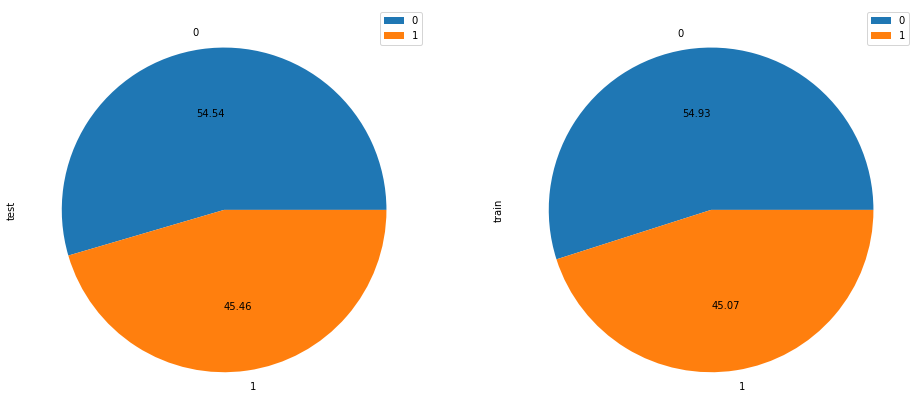

In [22]:
class_count.plot(kind="pie", subplots=True, figsize=(16,8), autopct="%.2f");

The class balance seems to be similar for train and test datasets.

### Transforming text

Using counting vectorizer

In [7]:
vectorizer = TfidfVectorizer()

In [8]:
vectorizer.fit(content_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [9]:
X_train = vectorizer.transform(content_train)

In [10]:
X_test  = vectorizer.transform(content_test)

### Training models

In [11]:
def train_classifiers(models, X_train, y_train):
    results = {}
    for name, model in models.items():
        classifier = model()
        classifier.fit(X_train, y_train)
        results[name] = classifier
        
    return results

In [12]:
def print_report(name, report):
    print("====================================================")
    print(name)
    print("====================================================")
    print(report)    

In [13]:
def print_results(results, X_test, y_test):
    for name, classifier in results.items():
        y_pred = classifier.predict(X_test)
        report = classification_report(y_test, y_pred)
        print_report(name, report)

In [14]:
models = {
    "Logistic Regression": LogisticRegression,
    "Decision Tree": DecisionTreeClassifier
}

In [15]:
results = train_classifiers(models, X_train, y_train)

/Users/cristianoaguiar/.pyenv/versions/3.7.2/envs/sm-project/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print_results(results, X_test, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       727
           1       0.90      0.77      0.83       606

    accuracy                           0.86      1333
   macro avg       0.86      0.85      0.85      1333
weighted avg       0.86      0.86      0.86      1333

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       727
           1       0.86      0.82      0.84       606

    accuracy                           0.86      1333
   macro avg       0.86      0.85      0.85      1333
weighted avg       0.86      0.86      0.86      1333



### Predictions

In [18]:
out_of_sample_dataset = pd.read_csv("../../data_processed/atn_with_bias_label.csv")

In [19]:
out_of_sample_dataset.head()

,date,label,text
0,2015-12-31,1,republican presidential candidate ben carson s...
1,2015-12-30,1,a nasty battle has broken out in the republica...
2,2015-12-30,1,donald trump launched new attacks against bill...
3,2016-01-01,1,the plunge in oil prices has given a needed br...
4,2016-01-01,1,president obama said on friday he will meet wi...


In [20]:
content_oos = out_of_sample_dataset["text"].values
y_oos = out_of_sample_dataset["label"].values
X_oos = vectorizer.transform(content_oos)

In [21]:
print_results(results, X_oos, y_oos)

Logistic Regression
              precision    recall  f1-score   support

           0       0.58      0.80      0.67      6590
           1       0.66      0.40      0.50      6409

    accuracy                           0.60     12999
   macro avg       0.62      0.60      0.59     12999
weighted avg       0.62      0.60      0.59     12999

Decision Tree
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      6590
           1       0.53      0.61      0.57      6409

    accuracy                           0.55     12999
   macro avg       0.55      0.55      0.54     12999
weighted avg       0.55      0.55      0.54     12999

